# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
print("Student 1 name: Ariel Shirkani")
print("Student 1 ID: 207267824:")
print("Student 1 E-Mail: arielshirkanistudent@gmail.com")
# Details Student 2:
print("Student 2 name: Shahar Sivilia")
print("Student 2 ID: 206375180")
print("Student 2 E-Mail: Shahars71@gmail.com")

Student 1 name: Ariel Shirkani
Student 1 ID: 207267824:
Student 1 E-Mail: arielshirkanistudent@gmail.com
Student 2 name: Shahar Sivilia
Student 2 ID: 206375180
Student 2 E-Mail: Shahars71@gmail.com


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
#pip install wn
#python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\97254\Python Notebooks\Ass3


In [8]:
#pip install wordcloud

### Custom imports
Importing a few things to help us with EDA and model building

In [9]:
from wordcloud import WordCloud
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [10]:
train_filename = r"C:\Users\97254\Python Notebooks\Ass3\annotated_corpus_for_train.csv"
test_filename  = r"C:\Users\97254\Python Notebooks\Ass3\corpus_for_test.csv"
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

### Initial data exploration
We take the initial, raw data and explore it from various angles

In [11]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [12]:
df_test.head(20)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...
5,5,בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...
6,6,בשנת 2018 קיבלתי החלטה שאני מתחיל ללמוד לתואר ...
7,7,"בנובמבר האחרון הייתי עם חברים בטיול ים אל ים, ..."
8,8,"לפני מספר חודשים, ביום שמש בהיר, קמתי בבוקר למ..."
9,9,"אני לא בן אדם שנוטה לשתף בחייו האישיים, אבל או..."


(323, 2)

# Data cleanup and EDA
First, we'll turn the initially char type gender labels into numeric ones.

Male = 0, Female = 1

In [13]:
# YOUR CODE HERE

#Male = 0, Female = 1
df_full = df_train.copy()
df_full = df_full.append(df_test)

df_train["gender"] = df_train["gender"].astype('category')
replace_m={'m': 0, 'f': 1}
df_train.replace(replace_m, inplace = True)

df_train


,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",0
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,0
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,1
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",0
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,1
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,0
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,0
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,0
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",1


Here we count how many words are in each story, and see the frequency of word ranges for stories.

In [14]:
num_of_words = [len(text.split()) for text in df_train["story"]]
df_train.insert(2, 'Number of Words', num_of_words)
df_train.head()

,story,gender,Number of Words
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",0,421
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,0,345
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,1,305
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",0,432
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,1,323


The maximum number of words is: 791
The minimum number of words is: 48


Text(0.5, 1.0, 'Number of Words')

<AxesSubplot:title={'center':'Number of Words'}>

Text(0.5, 0, 'Number of Words')

Text(0, 0.5, 'Frequency')

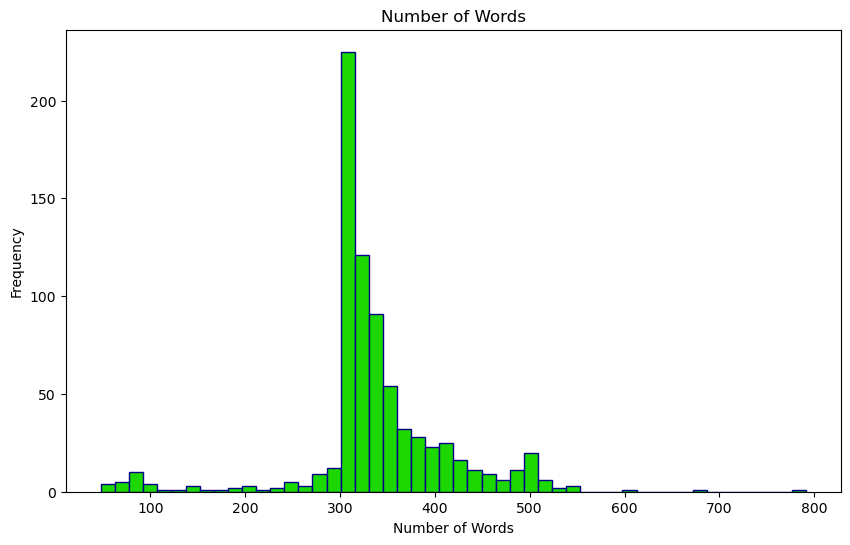

The mean of text length is: 337.50
The std is: 78.52


In [15]:
# Add as many code cells as you need
# YOUR CODE HERE
print("The maximum number of words is: %d"%max(df_train["Number of Words"]))
print("The minimum number of words is: %d"%min(df_train["Number of Words"]))
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Number of Words")
df_train["Number of Words"].hist(bins=50,density=False,rwidth=1,color='#1CD800',edgecolor='DarkBlue',grid=False)
ax.set_xlabel("Number of Words")
ax.set_ylabel("Frequency")
plt.show()
print("The mean of text length is: %.2f"%df_train["Number of Words"].mean())
print("The std is: %.2f"%df_train["Number of Words"].std())

<AxesSubplot:xlabel='Number of Words'>

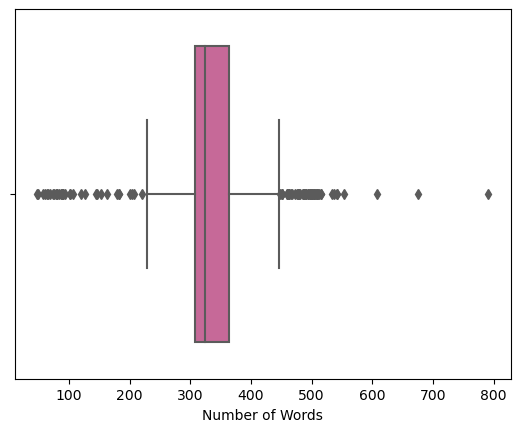

In [16]:
sns.boxplot(x = df_train["Number of Words"], color = "#D65998")

# Gender-related EDA
In this section, we explore the various differences between men and women in the given data.

In this graph, we can see that the clear majority of texts in our given data was written by men.

Text(0.5, 1.0, 'Data Story Author Gender Distribution')

<AxesSubplot:title={'center':'Data Story Author Gender Distribution'}, ylabel='gender'>

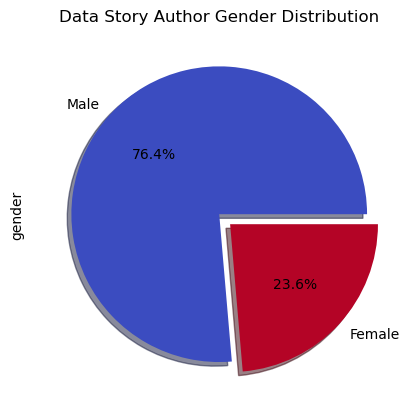

In [17]:
# YOUR CODE HERE
#sns.boxplot(x = df_train["Number of Words"], color = 'b')

value_counts = df_train['gender'].value_counts(normalize=False)

#Male = 575, Female = 178

glabels = ["Male", "Female"]
    
fig, ax = plt.subplots()
ax.set_title("Data Story Author Gender Distribution")
value_counts.plot(kind='pie', colormap = "coolwarm", labels = glabels, autopct='%1.1f%%', explode = [0, 0.1], shadow = True )
ax.grid(visible=True, linestyle='',  dash_capstyle = 'projecting')
plt.margins(0.2)
#ax.set_xticklabels(['Male', 'Female'], rotation = 0)
plt.show()

Here we can see the number of words for every story, and the gender of whoever wrote them.  
blue = male, red = female.

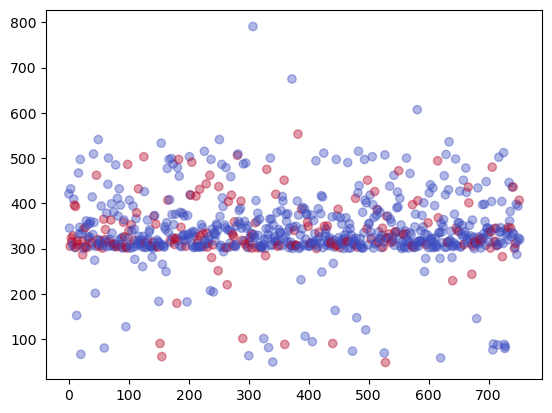

In [18]:
color = df_train["gender"]
colors = np.where(color == 0, "#3B4CC0", "#B40426")
plt.scatter(x = df_train.index, y = df_train["Number of Words"],c = colors, alpha = 0.4)

### Top 25 most common words regardless of gender
In this section we find and show the 25 most common words without any relation to the writer's gender. In both bar plot, and word cloud form.

In [19]:

# Connect all stories into a single string
text = ' '.join([text for text in df_train["story"]])

# Use TfIdf Vectorizing
vectorizer = TfidfVectorizer()

# Create frequency vector
freq_vec = vectorizer.fit_transform([text]).toarray()  
freqDist=dict(zip(vectorizer.get_feature_names_out(),freq_vec.sum(axis=0))) 
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) 

In [20]:
# Python can't work well with Hebrew, this list is made to visually flip each word, to better show them off.
freqDist_vis = {key[::-1]: value for key, value in freqDist.items()}

25 most frequent words:


<Figure size 1000x500 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'תא'),
  Text(1, 0, 'אל'),
  Text(2, 0, 'לש'),
  Text(3, 0, 'לע'),
  Text(4, 0, 'היה'),
  Text(5, 0, 'םע'),
  Text(6, 0, 'ילש'),
  Text(7, 0, 'יל'),
  Text(8, 0, 'ינא'),
  Text(9, 0, 'לכ'),
  Text(10, 0, 'הז'),
  Text(11, 0, 'רחאל'),
  Text(12, 0, 'דואמ'),
  Text(13, 0, 'אוה'),
  Text(14, 0, 'לבא'),
  Text(15, 0, 'המ'),
  Text(16, 0, 'םג'),
  Text(17, 0, 'התייה'),
  Text(18, 0, 'ינאש'),
  Text(19, 0, 'יכ'),
  Text(20, 0, 'המכ'),
  Text(21, 0, 'דחא'),
  Text(22, 0, 'ירחא'),
  Text(23, 0, 'ונל'),
  Text(24, 0, 'םוי')])

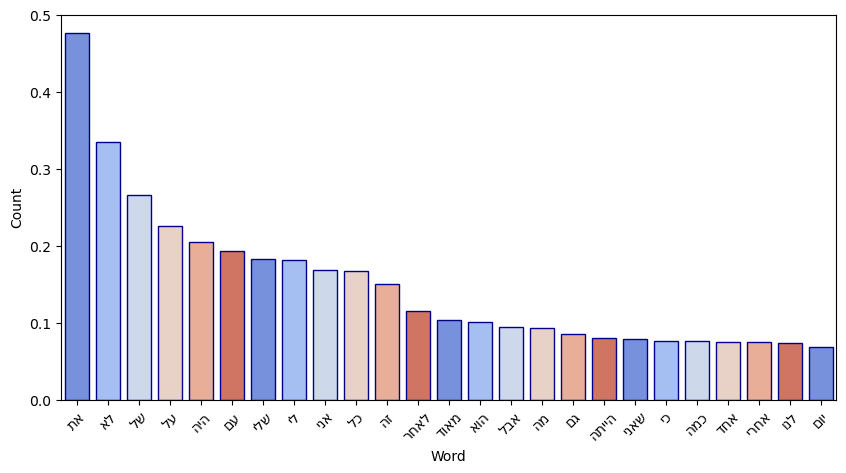

In [21]:
print("25 most frequent words:")
topK = 25


# Create bar plot using the previously created list of word frequencies. The labels are taken from the visual list.
plt.figure(figsize=(10,5))
d = pd.DataFrame({'Word':list(freqDist_vis)[:topK],'Count':list(freqDist.values())[:topK]})
ax = sns.barplot(data=d,x="Word",y="Count",palette=sns.color_palette("coolwarm"),edgecolor='DarkBlue')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 699.5, -0.5)

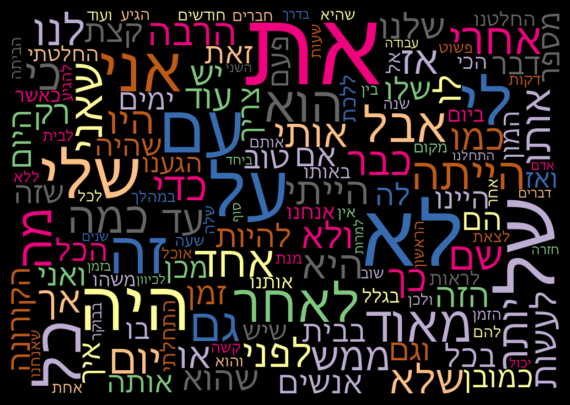

In [22]:
# Create a word cloud from the list of word frequencies. Again, this word cloud uses the visual list of frequencies for labels.

wordcloud = WordCloud(font_path= "C:\Windows\Fonts\gisha.ttf", width=1000,height=700,max_font_size=200, max_words=150,colormap="Accent", background_color="black").generate_from_frequencies(freqDist_vis)
plt.figure(figsize=[10,5], facecolor = "black")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Most common words, with regards to gender.
Here are more bar plots and word clouds, this time showing the most common words each gender wrote in their stories.

In [23]:
# First, split the training data based on gender.
df_fem = df_train[df_train["gender"] == 1]
df_mal = df_train[df_train["gender"] == 0]

25 most frequent words:


<Figure size 1000x500 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'תא'),
  Text(1, 0, 'אל'),
  Text(2, 0, 'לש'),
  Text(3, 0, 'לע'),
  Text(4, 0, 'ילש'),
  Text(5, 0, 'היה'),
  Text(6, 0, 'םע'),
  Text(7, 0, 'יל'),
  Text(8, 0, 'לכ'),
  Text(9, 0, 'הז'),
  Text(10, 0, 'ינא'),
  Text(11, 0, 'דואמ'),
  Text(12, 0, 'אוה'),
  Text(13, 0, 'לבא'),
  Text(14, 0, 'יכ'),
  Text(15, 0, 'ונל'),
  Text(16, 0, 'םג'),
  Text(17, 0, 'רחאל'),
  Text(18, 0, 'המ'),
  Text(19, 0, 'ירחא'),
  Text(20, 0, 'םוי'),
  Text(21, 0, 'ינאש'),
  Text(22, 0, 'דחא'),
  Text(23, 0, 'התייה'),
  Text(24, 0, 'ותוא')])

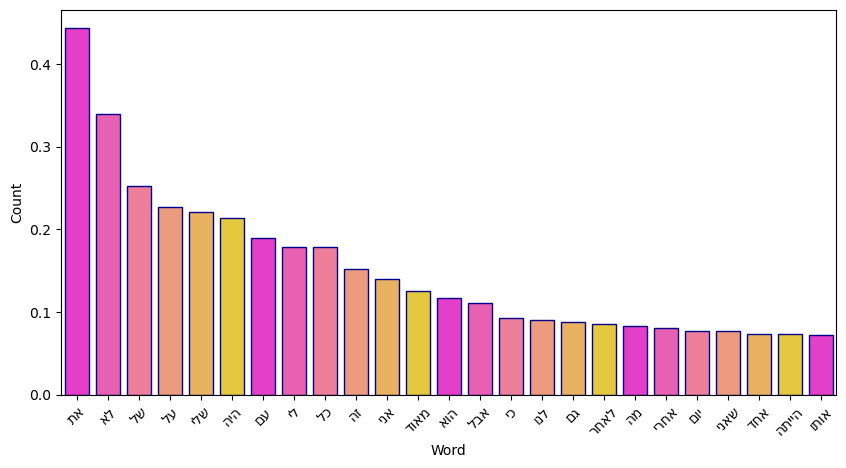

In [24]:
# Most frequently used words by female students

# Here we'll do everything we did in the general bar plot, but specifically for the female part of our data

textF = ' '.join([text for text in df_fem["story"]])
vectorizer = TfidfVectorizer() 
freq_vecF = vectorizer.fit_transform([textF]).toarray()  
freqDistF=dict(zip(vectorizer.get_feature_names_out(),freq_vecF.sum(axis=0))) 
freqDistF=dict(sorted(freqDistF.items(), key=lambda item: item[1],reverse=True)) 

freqDist_visF = {key[::-1]: value for key, value in freqDistF.items()}

print("25 most frequent words:")
topK = 25
plt.figure(figsize=(10,5))
d = pd.DataFrame({'Word':list(freqDist_visF)[:topK],'Count':list(freqDistF.values())[:topK]})
ax = sns.barplot(data=d,x="Word",y="Count",palette=sns.color_palette("spring"),edgecolor='DarkBlue')
plt.xticks(rotation=45)
plt.show()

25 most frequent words:


<Figure size 1000x500 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'תא'),
  Text(1, 0, 'אל'),
  Text(2, 0, 'לש'),
  Text(3, 0, 'לע'),
  Text(4, 0, 'היה'),
  Text(5, 0, 'םע'),
  Text(6, 0, 'יל'),
  Text(7, 0, 'ינא'),
  Text(8, 0, 'ילש'),
  Text(9, 0, 'לכ'),
  Text(10, 0, 'הז'),
  Text(11, 0, 'רחאל'),
  Text(12, 0, 'דואמ'),
  Text(13, 0, 'אוה'),
  Text(14, 0, 'המ'),
  Text(15, 0, 'לבא'),
  Text(16, 0, 'םג'),
  Text(17, 0, 'התייה'),
  Text(18, 0, 'ינאש'),
  Text(19, 0, 'המכ'),
  Text(20, 0, 'דחא'),
  Text(21, 0, 'ירחא'),
  Text(22, 0, 'יכ'),
  Text(23, 0, 'ונל'),
  Text(24, 0, 'םוי')])

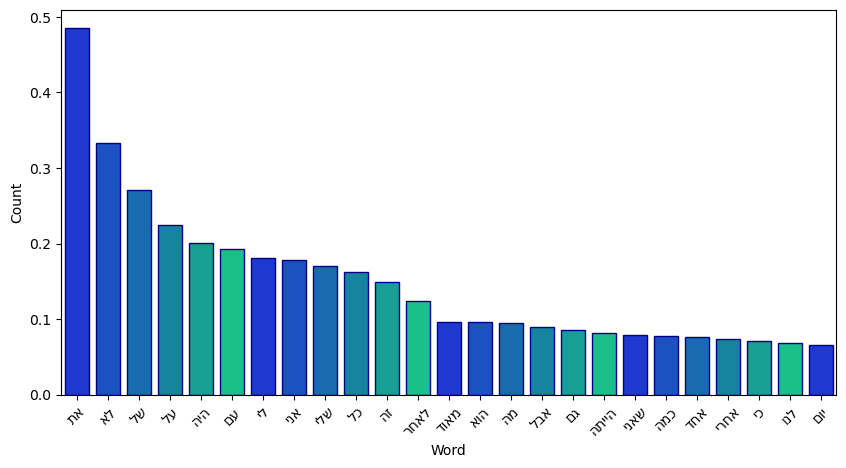

In [25]:
# Most frequently used words by male students

# Same for male students

textM = ' '.join([text for text in df_mal["story"]])
vectorizer = TfidfVectorizer() 
freq_vecM = vectorizer.fit_transform([textM]).toarray()
freqDistM=dict(zip(vectorizer.get_feature_names_out(),freq_vecM.sum(axis=0)))
freqDistM=dict(sorted(freqDistM.items(), key=lambda item: item[1],reverse=True))

freqDist_visM = {key[::-1]: value for key, value in freqDistM.items()}

print("25 most frequent words:")
topK = 25
plt.figure(figsize=(10,5))
d = pd.DataFrame({'Word':list(freqDist_visM)[:topK],'Count':list(freqDistM.values())[:topK]})
ax = sns.barplot(data=d,x="Word",y="Count",palette=sns.color_palette("winter"),edgecolor='DarkBlue')
plt.xticks(rotation=45)
plt.show()

(-0.5, 999.5, 699.5, -0.5)

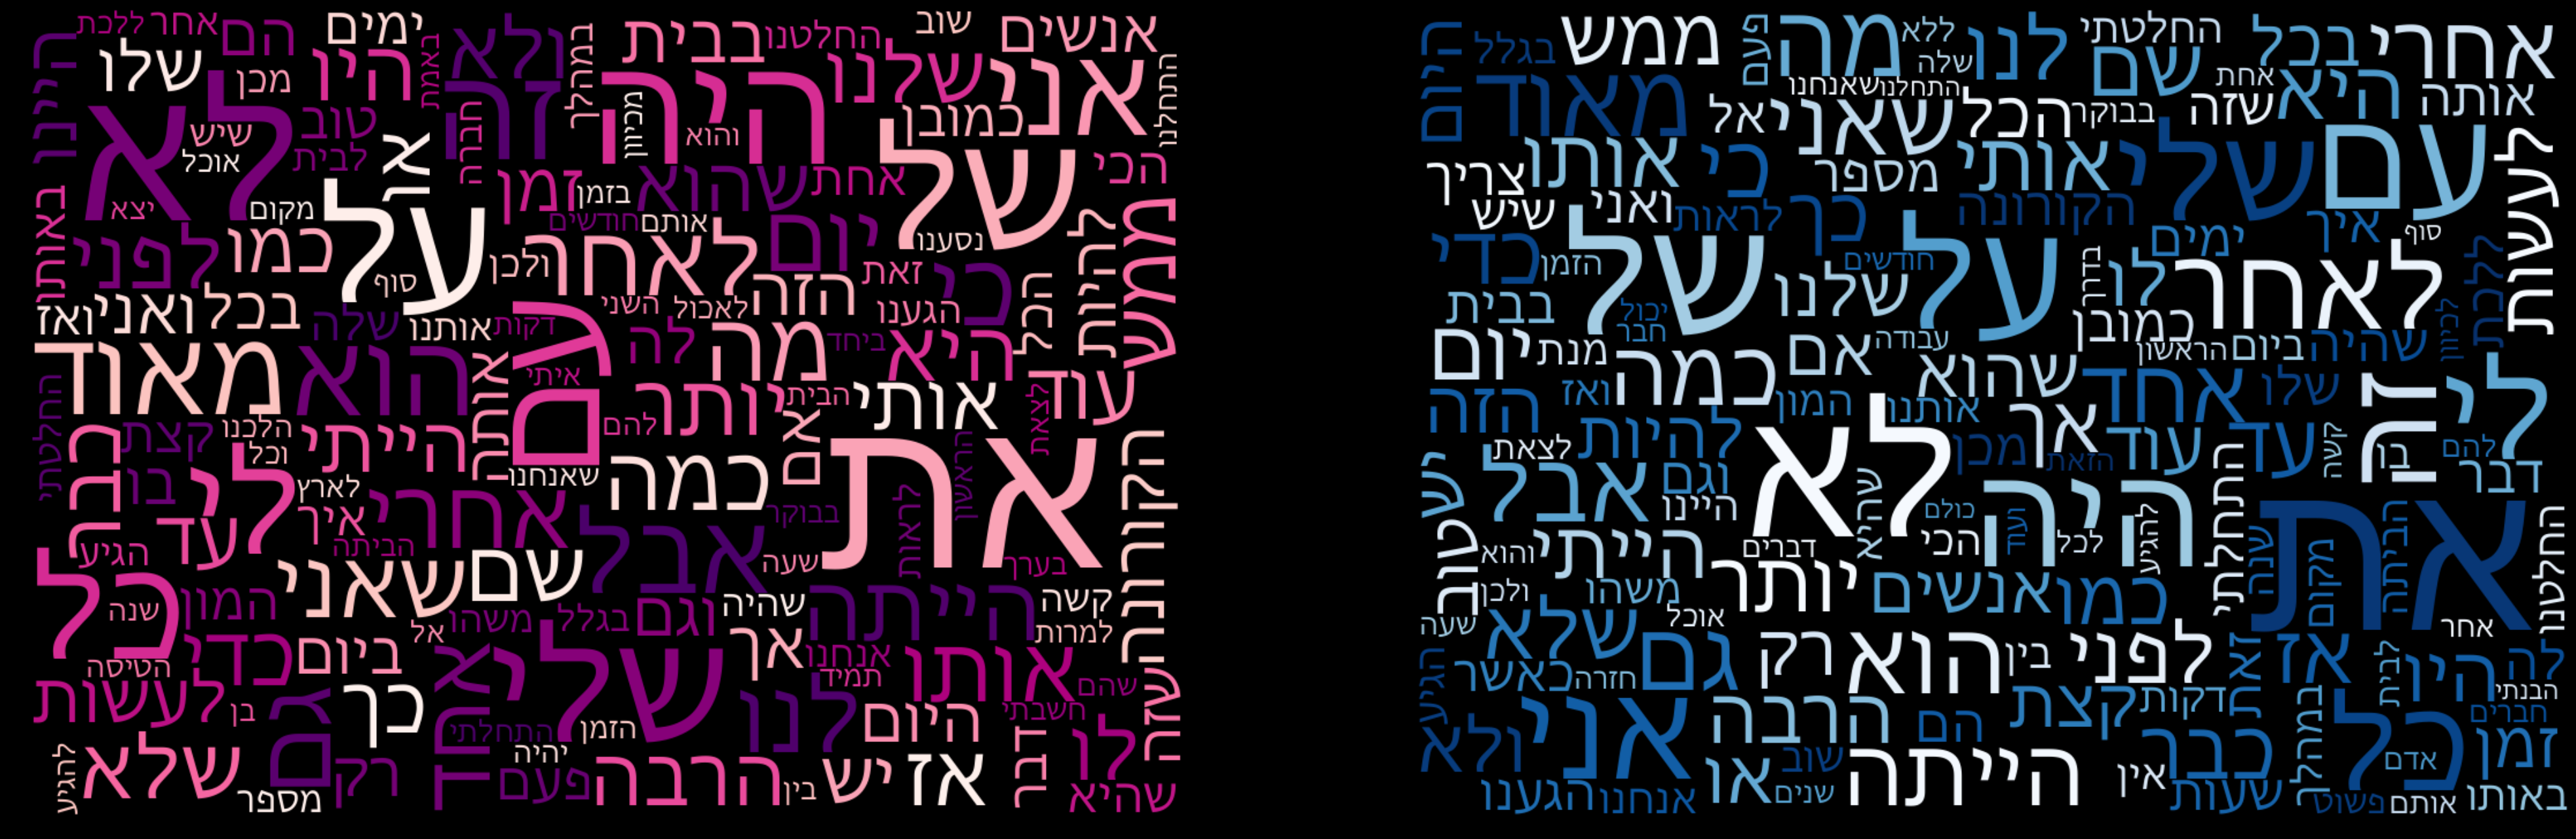

In [26]:
# Most common words for each gender. Left is for female students, right is for male students.

fig, axs = plt.subplots(2, figsize = (50,30), facecolor = "black")
wordcloudG = WordCloud(font_path= "C:\Windows\Fonts\gisha.ttf", width=1000,height=700,max_font_size=200, max_words=150,colormap="RdPu", background_color="black").generate_from_frequencies(freqDist_visF)
wordcloudB = WordCloud(font_path= "C:\Windows\Fonts\gisha.ttf", width=1000,height=700,max_font_size=200, max_words=150,colormap="Blues_r", background_color="black").generate_from_frequencies(freqDist_visM)


plt.subplot(1,2,1).imshow(wordcloudG, interpolation="bilinear")
plt.subplot(1,2,2).imshow(wordcloudB, interpolation="bilinear")
plt.axis("off")
plt.show()

# Vectorization and Machine Learning
Here we do the process of cleaning up the text data, vectorizing it, and fitting a machine learning model for it from a list of several.

In [27]:
# First, a function to clean up text.

def text_preprocessor(text):
    # Remove numbers, spaces, and leading/trailing spaces
    text = re.sub(r'\d+', '', text)
    # Remove non-Hebrew letters
    text = re.sub(r'[^\u0590-\u05FF\s]', '', text)
    # Replace consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    text = text.strip()
    return text

Paramaters for all machine learning models, will be used to find the optimal paramaters for each model via GridSearch

In [31]:


model_params = {
        'LogisticRegression': {
        'vectorizer': [TfidfVectorizer(min_df=5,max_df=753)],
        'vectorizer__max_features': [None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [LogisticRegression(class_weight='balanced')],
        'classifier__penalty': ['l1','l2']
        },
        'MultinomialNaiveBayes': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=753)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.01],
        },
        'Perceptron': {
        'vectorizer': [TfidfVectorizer(min_df=5, max_df=753)],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [Perceptron()],
        'classifier__penalty': ['l1','l2'],
        },
        'SVC': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=753), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [svm.SVC()],
        'classifier__kernel': ['linear','rbf','sigmoid'],
        'classifier__C': [0.01, 1, 10],
        'classifier__tol': [0.001],
        },
        'KNN': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=753), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 50],
        'classifier__p': [1, 2]
        },
        'DecisionTree': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=753)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1,1),(1,2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [DecisionTreeClassifier()],
        },
}

Now, to train a model with the best paramaters possible.

In [32]:
# Machine learning model fitting.

X = df_train["story"]
y = df_train["gender"]
X = X.apply(text_preprocessor)

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', None),
    ('scaler', None),
    ('classifier', None)
])

# We're using the KFold cross-validation method to improve our models' accuracies
cv = model_selection.KFold(n_splits = 5)

# Define F1 macro scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Perform grid search over the models_params dictionary
results = []
for model_name, model_params in model_params.items():
    print(f"\n\n\nGrid search for {model_name}:\n")
    clf = GridSearchCV(pipeline, model_params, cv=cv, scoring=f1_scorer, verbose=1,n_jobs=10)
    clf.fit(X, y)

    # Get the best hyperparameters
    best_params = clf.best_params_

    # Perform cross-validation with the specified scoring method
    cv_scores = cross_val_score(clf.best_estimator_, X, y, scoring=f1_scorer, cv=10)

    # Calculate the mean of cv_scores
    cv_mean_score = np.mean(cv_scores)

    # Store the results
    result = {
        "model_name": model_name,
        "best_params": best_params,
        "cv_mean_score": cv_mean_score
    }
    results.append(result)

    # Print the results for the current clf
    print(f"Best hyperparameters:\n{best_params}")
    print(f"Cross-validated F1 macro mean score:\n{cv_mean_score:.4f}") 
    print("\n*********************************************************\n")

# Print the final results
for result in results:
    print(f"Model:\n{result['model_name']}")
    print(f"Best hyperparameters:\n{result['best_params']}")
    print(f"Cross-validated F1 macro mean score:\n{result['cv_mean_score']:.4f}") 
    print("\n*********************************************************\n")
    





Grid search for LogisticRegression:

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [LogisticRegression(class_weight='balanced')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [TfidfVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6948

*********************************************************




Grid search for MultinomialNaiveBayes:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [MultinomialNB(alpha=0.01)],
                         'classifier__alpha': [0.01],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [CountVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6459

*********************************************************




Grid search for Perceptron:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [Perceptron(penalty='l2')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [TfidfVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 2))],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': Perceptron(penalty='l2'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, min_df=5, ngram_range=(1, 2)), 'vectorizer__ngram_range': (1, 2)}
Cross-validated F1 macro mean score:
0.6583

*********************************************************




Grid search for SVC:

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [SVC(C=10, kernel='sigmoid')],
                         'classifier__C': [0.01, 1, 10],
                         'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
                         'classifier__tol': [0.001],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5),
                                        TfidfVectorizer()],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': SVC(C=10, kernel='sigmoid'), 'classifier__C': 10, 'classifier__kernel': 'sigmoid', 'classifier__tol': 0.001, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, min_df=5), 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6902

*********************************************************




Grid search for KNN:

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [5, 50],
                         'classifier__p': [1, 2],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5),
                                        TfidfVectorizer(max_features=2000,
                                                        ngram_range=(1, 3))],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'classifier__p': 2, 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_features=2000, ngram_range=(1, 3)), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 3)}
Cross-validated F1 macro mean score:
0.5109

*********************************************************




Grid search for DecisionTree:

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [DecisionTreeClassifier()],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 2))],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': DecisionTreeClassifier(), 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, min_df=5, ngram_range=(1, 2)), 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}
Cross-validated F1 macro mean score:
0.6023

*********************************************************

Model:
LogisticRegression
Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6948

*********************************************************

Model:
MultinomialNaiveBayes
Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000,

Here are the F1 scores for each model in an easy-to-read dataframe

In [33]:
df_res = pd.DataFrame(results)
df_res.drop("best_params", axis = 1)

,model_name,cv_mean_score
0,LogisticRegression,0.695
1,MultinomialNaiveBayes,0.646
2,Perceptron,0.658
3,SVC,0.690
4,KNN,0.511
5,DecisionTree,0.602


Now, to use the best scoring model with the best paramaters for the prediction process

In [34]:
# Update the pipeline with the best estimator
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=753, max_features=2000, min_df=5, ngram_range = (1, 1))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty = 'l2', class_weight='balanced'))
])

# # Fit the pipeline to the training data with the best estimator
pipeline.fit(df_train['story'].apply(text_preprocessor), y) # y is binary (1 for female)

# Make predictions on the test data
y_pred_test = pipeline.predict(df_test['story'].apply(text_preprocessor))

# Sample first and last 5 rows of df_test and predict on them
df_predicted = df_test.copy()
df_predicted['predicted_category'] = y_pred_test
df_predicted['predicted_category'] = pd.Series(y_pred_test).map({0: 'm', 1: 'f'})

# Print it out
df_predicted

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=753, max_features=2000, min_df=5)),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

,test_example_id,story,predicted_category
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",f
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,f
...,...,...,...
318,318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...",m
319,319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...",m


Now, to print out the number of predicted texts written by each gender.

In [35]:
print(f"The number of predicted female-written texts is:\n",{df_predicted[df_predicted["predicted_category"] == 'f'].shape[0]})
print(f"The number of predicted male-written texts is:\n",{df_predicted[df_predicted["predicted_category"] == 'm'].shape[0]})

The number of predicted female-written texts is:
 {55}
The number of predicted male-written texts is:
 {268}


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [36]:
df_predicted.to_csv('classification_results.csv',index=False)